# Evaluation of RAG architectures

In [1]:
from tqdm import tqdm
from pathlib import Path
from llms.clients.gpt import GPTClient
from llms.settings import settings
from llms.rag.faiss import DistanceMetric
from llms.evaluation.code import evaluate_code_generation, ConfigGrid, RAG, RAGRetriever
from tests.pandas_zero_shot import TEST_CASES

c:\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Read the pandas documentation we have scraped.

In [ ]:
def get_texts(folder_paths: list[str]) -> list[str]:
    folder_paths = [Path(folder_path) for folder_path in folder_paths]
    files = []
    for folder_path in tqdm(folder_paths, desc="Searching for files"):
        for child in folder_path.iterdir():
            if child.is_file():
                files.append(child)
    texts = []
    for file in tqdm(files, desc="Reading files"):
        with open(file, "r", encoding="utf-8") as f:
            content = f.read()
            texts.append(content)
    return texts

In [ ]:
folder_paths = ["files/pandas/textfiles/textfiles1", "files/pandas/textfiles/textfiles2", "files/pandas/textfiles/textfiles3"]
texts = get_texts(folder_paths)

Create a GPT-4 client

In [ ]:
gpt_4_client = GPTClient(
    client_id=settings.CLIENT_ID,
    client_secret=settings.CLIENT_SECRET,
    auth_url=settings.AUTH_URL,
    api_base=settings.API_BASE,
    deployment_id='gpt-4-32k',
    max_response_tokens=250,
    temperature=0.0,
)

Create a configuration grid. The combinations will be generated using the cartesian cartesian product.

In [ ]:
config_grid = ConfigGrid(
    llms=[gpt_4_client],
    rag=RAG(
        retrievers=[
            RAGRetriever.NONE,
            RAGRetriever.RAG,
            RAGRetriever.RAG_AS_TOOL,
            RAGRetriever.CoALA,
            RAGRetriever.CoALA_AS_TOOL,
        ],
        distance_metrics=[DistanceMetric.EUCLIDEAN_DISTANCE, DistanceMetric.MAX_INNER_PRODUCT],
        num_search_results=[1, 3],
        similarity_search_score_thresholds=[0.0],
        text_chunk_sizes=[512],
        use_weighted_average_of_text_chunks=[True],
        texts=texts,
    )
)

Evaluates code generation. Embeddings will be automatically created and can be found in the embeddings folder, while the results can be found in the results folder. The results are sorted by accuracy and each configuration will have a path to the details of the test cases. The details contains the test case, the generated code, whether the generated code leads to the expected result, the time taken, the total cost, and the agent reasoning, allowing a comprehensive understanding of what the AI agent actually did under the hood.

In [ ]:
results = evaluate_code_generation(config_grid=config_grid, test_cases=TEST_CASES, test_name="pandas_zero_shot")

In [2]:
import pandas as pd
# import matplotlib.pyplot as plt
import plotly.express as px

In [41]:
path = "./results"
df_one_shot = pd.read_csv(f"{path}/pandas_one_shot.csv")
df_zero_shot = pd.read_csv(f"{path}/pandas_zero_shot.csv")
df_zero_shot_structured = pd.read_csv(f"{path}/pandas_zero_shot_structured.csv")

In [60]:
dfs = [df_one_shot, df_zero_shot, df_zero_shot_structured]

df_combined = pd.concat(dfs)
display(df_combined[['index', 'config']])

df_avg = df_combined.groupby('index').agg({'total_time': 'mean', 'total_cost': 'mean'}).reset_index()

,index,config
0,8,"{'llm': 'gpt-4-32k', 'retriever': <RAGRetrieve..."
1,13,"{'llm': 'gpt-4-32k', 'retriever': <RAGRetrieve..."
2,3,"{'llm': 'gpt-4-32k', 'retriever': <RAGRetrieve..."
3,5,"{'llm': 'gpt-4-32k', 'retriever': <RAGRetrieve..."
4,10,"{'llm': 'gpt-4-32k', 'retriever': <RAGRetrieve..."
5,16,"{'llm': 'gpt-4-32k', 'retriever': <RAGRetrieve..."
6,1,"{'llm': 'gpt-4-32k', 'retriever': <RAGRetrieve..."
7,11,"{'llm': 'gpt-4-32k', 'retriever': <RAGRetrieve..."
8,6,"{'llm': 'gpt-4-32k', 'retriever': <RAGRetrieve..."
9,14,"{'llm': 'gpt-4-32k', 'retriever': <RAGRetrieve..."


In [50]:
display(df_avg)

,index,total_time,total_cost
0,0,581.298378,9.059780
1,1,562.532245,15.032689
2,2,666.785234,33.479149
3,3,506.196917,13.694409
4,4,583.044284,28.827849
5,5,557.694712,7.155322
6,6,509.762362,4.533130
7,7,487.861469,16.250831
8,8,295.956861,2.111260
9,9,601.357738,14.521812


In [31]:
df.plot(kind='bar', x='index', y='accuracy', legend=False)
plt.title('Accuracy for solving test cases')
plt.xlabel('Id')
plt.ylabel('Accuracy')
plt.show()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [32]:
fig = px.bar(df, x='index', y='accuracy', title='Accuracy for solving test cases',
             labels={'index': 'Id', 'accuracy': 'Accuracy'}, width=800, height=500,
             category_orders={"index": df['accuracy'].sort_values(ascending=False)})

fig.update_layout(xaxis_title='Id', yaxis_title='Accuracy', showlegend=False, bargap=0.2,
                  xaxis=dict(tickmode='linear', tick0=0, dtick=1, tickfont=dict(size=18)),
                  yaxis=dict(tickfont=dict(size=25)),
                  yaxis_title_font=dict(size=30),
                  xaxis_title_font=dict(size=30),
                  title_font=dict(size=45))  # Adjust the font size as needed

fig.show()
fig.write_image("total_acc_one_shot.png", width=1200, height=800, scale=2)

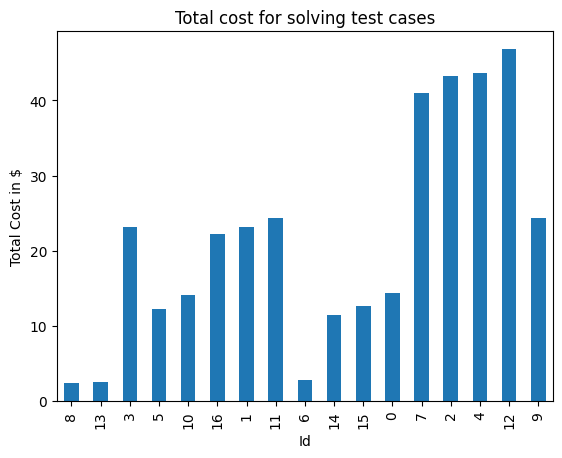

In [5]:
df.plot(kind='bar', x='index', y='total_cost', legend=False)
plt.title('Total cost for solving test cases')
plt.xlabel('Id')
plt.ylabel('Total Cost in $')
plt.show()

In [57]:
fig = px.bar(df_avg, x='index', y='total_cost', title='Average Cost per Config',
             labels={'index': 'Id', 'total_cost': 'Total Cost'}, width=800, height=500)

fig.update_layout(xaxis_title='Configuration', yaxis_title='Total Cost (in USD)', showlegend=False, bargap=0.2,
                  xaxis=dict(tickmode='linear', tick0=0, dtick=1, tickfont=dict(size=18)),
                  yaxis=dict(tickfont=dict(size=25)),
                  yaxis_title_font=dict(size=30),
                  xaxis_title_font=dict(size=30),
                  title_font=dict(size=45))

fig.show()
fig.write_image("total_cost.png", width=1200, height=800, scale=2)  # Adjust width, height, and scale as needed

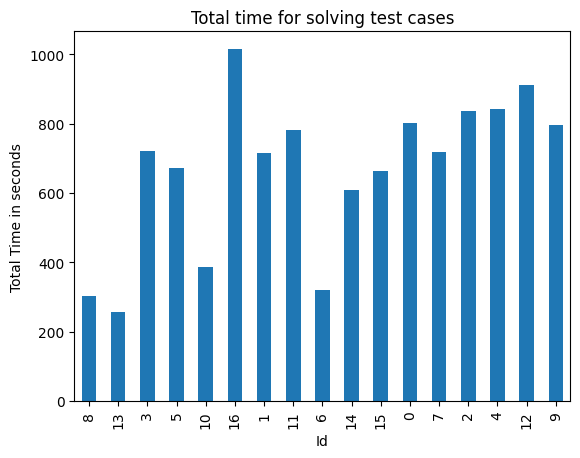

In [6]:
df.plot(kind='bar', x='index', y='total_time', legend=False)
plt.title('Total time for solving test cases')
plt.xlabel('Id')
plt.ylabel('Total Time in seconds')
plt.show()

In [56]:
fig = px.bar(df_avg, x='index', y='total_time', title='Average Time taken per Config',
             labels={'index': 'Id', 'total_time': 'Total Time'}, width=800, height=500)

fig.update_layout(xaxis_title='Configuration', yaxis_title='Average Time taken (seconds)', showlegend=False, bargap=0.2,
                  xaxis=dict(tickmode='linear', tick0=0, dtick=1, tickfont=dict(size=18)),
                  yaxis=dict(tickfont=dict(size=25)),
                  yaxis_title_font=dict(size=30),
                  xaxis_title_font=dict(size=30),
                  title_font=dict(size=45))

fig.show()
fig.write_image("total_time.png", width=1200, height=800, scale=2)  # Adjust width, height, and scale as needed

In [7]:
details_path = df.iloc[0].details_csv_filepath
details_df = pd.read_csv(details_path)
details_df

,index,correct,time_taken,cost,test_case,test_case_output,test_case_input_data,test_case_correct_function,generated_code,generated_code_output,agent_error,agent_reasoning
0,0,1,30.293166,0.19458,\n I have a one-hot encoded DataFrame w...,col1 col2\n0 a b\n1 b a\n2 a ...,"data = pd.DataFrame({""col1_a"": [1, 0, 1], ""col...",import pandas as pd\ndef correct_function(data...,def response_function(df):\n import pandas ...,col1 col2\n0 a b\n1 b a\n2 a ...,NaN,"[{'User prompt': ""\n I have a one-hot e..."
1,1,1,7.936067,0.08478,\n I want to change the indices of the ...,Name Age Location\n100 Alice 25 ...,"data = pd.DataFrame({'Name': ['Alice', 'Bob', ...",import pandas as pd\ndef correct_function(data...,def response_function(df):\n import pandas ...,Name Age Location\n100 Alice 25 ...,NaN,"[{'User prompt': ""\n I want to change t..."
2,2,1,8.219776,0.07914,\n Return all rows of the DataFrame exc...,animal\n0 alligator\n1 bee\n2 ...,"data = pd.DataFrame({'animal': ['alligator', '...",import pandas as pd\ndef correct_function(data...,def response_function(df):\n import pandas ...,animal\n0 alligator\n1 bee\n2 ...,NaN,"[{'User prompt': ""\n Return all rows of..."
3,3,1,7.965719,0.07218,\n Please add 2 months to the timestamp...,2017-03-01 09:10:11,data = pd.Timestamp('2017-01-01 09:10:11'),import pandas as pd\ndef correct_function(data...,def response_function(ts):\n import pandas ...,2017-03-01 09:10:11,NaN,"[{'User prompt': ""\n Please add 2 month..."
4,4,1,7.933401,0.07872,\n Calculate the sum using the expandin...,a 1.0\nb 3.0\nc 6.0\nd 10.0\ndt...,"data = pd.Series([1, 2, 3, 4], index=['a', 'b'...",import pandas as pd\ndef correct_function(data...,def response_function(data):\n import panda...,a 1.0\nb 3.0\nc 6.0\nd 10.0\ndt...,NaN,"[{'User prompt': ""\n Calculate the sum ..."
5,5,1,10.103331,0.08190,\n First group the DataFrame by 'a'. Th...,b c\na \n1 16 10\n2 30 72,"data = pd.DataFrame([[1, 8, 2], [1, 2, 5], [2,...",import pandas as pd\ndef correct_function(data...,def response_function(df):\n import pandas ...,b c\na \n1 16 10\n2 30 72,NaN,"[{'User prompt': ""\n First group the Da..."
6,6,1,10.020241,0.09156,\n Please give me the floating division...,a 1.0\nb inf\nc inf\nd 0.0\ne N...,"data_1 = pd.Series([1, 1, 1, None], index=['a'...",import pandas as pd\nimport numpy as np\ndef c...,"def response_function(data_1, data_2):\n im...",a 1.0\nb inf\nc inf\nd 0.0\ne N...,NaN,"[{'User prompt': ""\n Please give me the..."
7,7,0,14.128871,0.10710,\n Please drop column 'a' of the DataFr...,level_1 level_2 \n c d ...,"data = pd.DataFrame({('level_1', 'c', 'a'): [3...",import pandas as pd\ndef correct_function(data...,def response_function(df):\n import pandas ...,level_1 level_2\n d f\n ...,NaN,"[{'User prompt': ""\n Please drop column..."
8,8,0,13.514547,0.07980,\n Sort the pandas Series in ascending ...,0 0 NaN\n1 1.0\n2 3.0\n3 10....,"data = pd.Series([None, 1, 3, 10, 5, None])",import pandas as pd\ndef correct_function(*arg...,def response_function(data):\n import panda...,0 NaN\n5 NaN\n1 1.0\n2 3.0\n4 ...,NaN,[{'User prompt': '\n Sort the pandas Se...
9,9,1,23.240142,0.17694,\n Convert the following dictionaries i...,23.5,"data_1 = {'Name': ['Alice', 'Bob', 'Charlie'],...",import pandas as pd\ndef correct_function(data...,"def response_function(data1, data2):\n impo...",23.5,NaN,"[{'User prompt': ""\n Convert the follow..."


In [8]:
print(f"Correct: {details_df.iloc[0].correct}")
print(f"Test case:{details_df.iloc[0].test_case}")
print(f"Correct function:\n{details_df.iloc[0].test_case_correct_function}")
print(f"Generated function:\n{details_df.iloc[0].generated_code}")

Correct: 1
Test case:
        I have a one-hot encoded DataFrame with '_' as the separator.
        How can I revert this one-hot encoded DataFrame back into a categorical DataFrame using pandas?

        The following DataFrame will be the only function argument:
        df = pd.DataFrame({
            'col1_a': [1, 0, 1],
            'col1_b': [0, 1, 0],
            'col2_a': [0, 1, 0],
            'col2_b': [1, 0, 0],
            'col2_c': [0, 0, 1],
        })

        Desired Output:
            col1 col2
        0    a    b
        1    b    a
        2    a    c
        
Correct function:
import pandas as pd
def correct_function(data):
    result = pd.from_dummies(data, sep="_")
    return result
Generated function:
def response_function(df):
    import pandas as pd
    
    def revert_one_hot(row):
        return row.idxmax().split('_')[1]
    
    df = df.groupby(by=lambda x: x.split('_')[0], axis=1).apply(lambda x: x.apply(revert_one_hot, axis=1))
    return df


In [9]:
from pprint import pprint
print("AI agent reasoning:")
pprint(details_df.iloc[0].agent_reasoning)

AI agent reasoning:
('[{\'User prompt\': "\\n        I have a one-hot encoded DataFrame with \'_\' '
 'as the separator.\\n        How can I revert this one-hot encoded DataFrame '
 'back into a categorical DataFrame using pandas?\\n\\n        The following '
 'DataFrame will be the only function argument:\\n        df = '
 "pd.DataFrame({\\n            'col1_a': [1, 0, 1],\\n            'col1_b': "
 "[0, 1, 0],\\n            'col2_a': [0, 1, 0],\\n            'col2_b': [1, 0, "
 "0],\\n            'col2_c': [0, 0, 1],\\n        })\\n\\n        Desired "
 'Output:\\n            col1 col2\\n        0    a    b\\n        1    b    '
 'a\\n        2    a    c\\n        "}, {\'Thought\': "To revert a one-hot '
 'encoded DataFrame back into a categorical DataFrame, we need to iterate over '
 'each row and for each column, find the column name where the value is 1. '
 "This column name will be split by the separator '_' and the second part will "
 "be the category. We can use the pandas func